## Observations and Insights 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
combined_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [32]:
# Checking the number of mice.
mouse_count = combined_data_df["Mouse ID"].nunique()
mouse_count

249

In [33]:
#check column names
combined_data_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [43]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
grouped_data_all = combined_data_df.loc[:,["Mouse ID", "Timepoint",'Tumor Volume (mm3)', 'Drug Regimen']]
duplicate_id= grouped_data_all.loc[grouped_data_all.duplicated(subset=['Mouse ID', 'Timepoint'])]
print(duplicate_id)

    Mouse ID  Timepoint  Tumor Volume (mm3) Drug Regimen
909     g989          0           45.000000     Propriva
911     g989          5           47.570392     Propriva
913     g989         10           49.880528     Propriva
915     g989         15           53.442020     Propriva
917     g989         20           54.657650     Propriva


In [45]:
# Optional: Get all the data for the duplicate mouse ID. 
all_duped_data = grouped_data_all.loc[grouped_data_all['Mouse ID'] == "g989"]
all_duped_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
908,g989,0,45.000000,Propriva
909,g989,0,45.000000,Propriva
910,g989,5,48.786801,Propriva
911,g989,5,47.570392,Propriva
912,g989,10,51.745156,Propriva
913,g989,10,49.880528,Propriva
914,g989,15,51.325852,Propriva
915,g989,15,53.442020,Propriva
916,g989,20,55.326122,Propriva
917,g989,20,54.657650,Propriva


In [46]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
duplicate_id= grouped_data_all.loc[grouped_data_all.duplicated(subset=['Mouse ID', 'Timepoint'])]
duplicate_id
clean_df = grouped_data_all.loc[grouped_data_all['Mouse ID'] != "g989"]
clean_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,k403,0,45.000000,Ramicane
1,k403,5,38.825898,Ramicane
2,k403,10,35.014271,Ramicane
3,k403,15,34.223992,Ramicane
4,k403,20,32.997729,Ramicane
...,...,...,...,...
1888,z969,25,63.145652,Naftisol
1889,z969,30,65.841013,Naftisol
1890,z969,35,69.176246,Naftisol
1891,z969,40,70.314904,Naftisol


In [47]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean = clean_df["Mouse ID"].nunique()
mouse_count_clean

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_df = combined_data_df.groupby(['Drug Regimen'])
mean_tumor_volume = drug_regimen_df['Tumor Volume (mm3)'].mean()
median_tumor = drug_regimen_df['Tumor Volume (mm3)'].median()
variance_tumor = drug_regimen_df['Tumor Volume (mm3)'].var()
stdev_tumor = drug_regimen_df['Tumor Volume (mm3)'].std()
sem_tumor = drug_regimen_df['Tumor Volume (mm3)'].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean": mean_tumor_volume,
                           "Median": median_tumor, 
                           "Variance": variance_tumor,
                           "Standard Deviation": stdev_tumor,
                           "SEM": sem_tumor})
summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [50]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_groupby = clean_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
# This method produces everything in a single groupby function
summary_groupby

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [51]:
#background to create charts
drugs_df = combined_data_df[["Mouse ID", "Drug Regimen"]]
drugs_df = drugs_df.drop_duplicates(subset=['Mouse ID', "Drug Regimen"])
drugs_df = drugs_df.reset_index(drop=True)
print(drugs_df)
drugs = drugs_df["Drug Regimen"].unique()
print(drugs)
drug_count = drugs_df["Drug Regimen"].value_counts()
print(drug_count)

    Mouse ID Drug Regimen
0       k403     Ramicane
1       s185    Capomulin
2       x401    Capomulin
3       m601    Capomulin
4       g791     Ramicane
..       ...          ...
244     z314     Stelasyn
245     z435     Propriva
246     z581    Infubinol
247     z795     Naftisol
248     z969     Naftisol

[249 rows x 2 columns]
['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']
Capomulin    25
Infubinol    25
Ramicane     25
Ketapril     25
Zoniferol    25
Placebo      25
Naftisol     25
Ceftamin     25
Propriva     25
Stelasyn     24
Name: Drug Regimen, dtype: int64


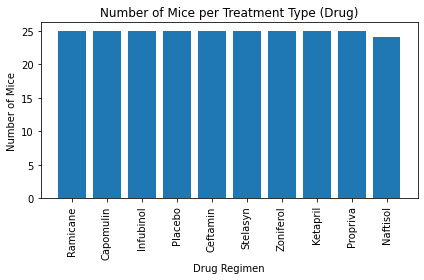

In [52]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
x_axis = np.arange(len(drugs))
tick_locations = [value for value in x_axis]
y_axis = drug_count
plt.bar(x_axis, y_axis, align="center")
plt.xticks(tick_locations, drugs, rotation="vertical")
plt.title("Number of Mice per Treatment Type (Drug)")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.tight_layout()
plt.savefig("./Images/mice_barplot_pandas.png")
plt.show()

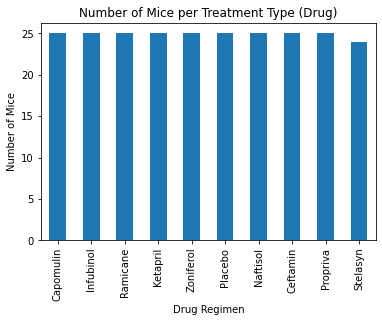

In [53]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
drug_plot = drug_count.plot(kind="bar", title="Number of Mice per Treatment Type (Drug)")
drug_plot.set_xlabel("Drug Regimen")
drug_plot.set_ylabel("Number of Mice")
plt.savefig("./Images/mice_barplot_pyplot.png")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

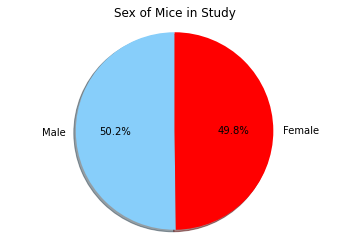

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_mice_df = mouse_metadata["Sex"]
sex_mice_count = sex_mice_df.value_counts()
sex_mice_labels = ["Male", "Female"]
colors=["lightskyblue", "red"]
plt.pie(sex_mice_count, labels=sex_mice_labels, colors=colors, autopct="%1.1f%%", startangle=90, shadow=True)
plt.title("Sex of Mice in Study")
plt.axis("equal")
plt.savefig("./Images/mice_pieplot_pandas.png")
plt.show


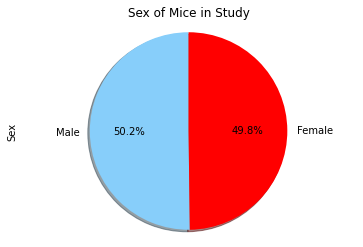

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = mouse_metadata["Sex"]
sex_count = sex_df.value_counts()
sex_plot = sex_count.plot(kind="pie", title="Sex of Mice in Study", autopct="%1.1f%%", 
                          startangle=90, colors=["lightskyblue", "red"], shadow=True)
plt.axis("equal")
plt.savefig("./Images/mice_pieplot_pyplot.png")
plt.show()


## Quartiles, Outliers and Boxplots

In [57]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_series = clean_df.groupby('Mouse ID').max()['Timepoint']
max_timepoint_series

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
max_timepoint_df = max_timepoint.reset_index()
max_timepoint_df

max_timepoint_merged_df = pd.merge(max_timepoint_df[["Mouse ID", "Timepoint"]], clean_df, on=["Mouse ID", "Timepoint"], how="left")
max_timepoint_merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Drug Regimen
0,a203,45,67.973419,Infubinol
1,a251,45,65.525743,Infubinol
2,a262,45,70.717621,Placebo
3,a275,45,62.999356,Ceftamin
4,a366,30,63.440686,Stelasyn
...,...,...,...,...
243,z435,10,48.710661,Propriva
244,z578,45,30.638696,Ramicane
245,z581,45,62.754451,Infubinol
246,z795,45,65.741070,Naftisol


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_data_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [71]:
#line plot data for single mouse of timepoint versus tumor volume with Capomulin
capomulin_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin", :]
capomulin_mouse = capomulin_df.loc[capomulin_df["Mouse ID"] == "s185"]

Text(0, 0.5, 'Tumor Volume(mm3)')

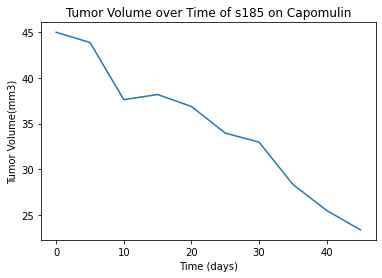

In [72]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(capomulin_mouse["Timepoint"], capomulin_mouse["Tumor Volume (mm3)"])
plt.title("Tumor Volume over Time of S185 on Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume(mm3)")

In [69]:
#line plot data for different mouse of timepoint versus tumor volume with Capomulin
capomulin_df = combined_data_df.loc[combined_data_df["Drug Regimen"] == "Capomulin", :]
capomulin_mouse2 = capomulin_df.loc[capomulin_df["Mouse ID"] == "l509"]

Text(0, 0.5, 'Tumor Volume(mm3)')

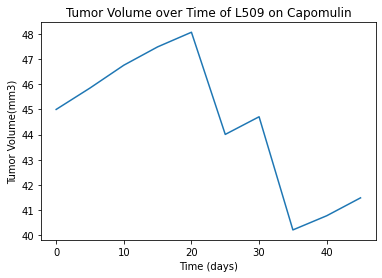

In [73]:
# Generate a different line plot of time point versus tumor volume for a mouse treated with Capomulin
plt.plot(capomulin_mouse2["Timepoint"], capomulin_mouse2["Tumor Volume (mm3)"])
plt.title("Tumor Volume over Time of L509 on Capomulin")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume(mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

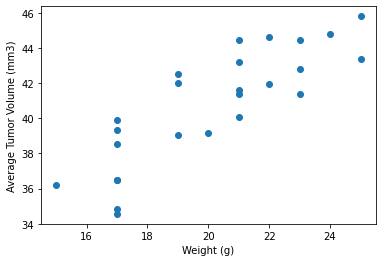

In [74]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
scatterplot_df = capomulin_df.groupby("Mouse ID").mean()
plt.scatter(scatterplot_df["Weight (g)"], scatterplot_df["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
